# EXPLORATIVE DATA ANALYSIS
## Cargar librerìas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


## Load dataset and structure

In [2]:
# load data and dimensions
df = pd.read_csv("ILPD.csv")   
print("### Data Dimensions:", df.shape)

#NUMERIC AND CATEGORICAL
y = df['Dataset']
X = df.drop('Dataset', axis=1)
# 1. Mostrar los tipos de datos de todas las columnas en X
print("\n### Tipos de datos en X:\n", X.dtypes)
# 2. Identificar variables Numéricas
# Selecciona todas las columnas cuyo tipo de dato sea int64 o float64
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 3. Identificar variables Categóricas/de Texto
# Selecciona todas las columnas cuyo tipo de dato sea 'object'
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# 4. Resultados
print("\n### Variables Numéricas (", len(numerical_features), "):", numerical_features)
print("\n### Variables Categóricas (", len(categorical_features), "):", categorical_features)

print("\n### First Rows:\n", df.head())
print("\n### Summary Statistics:\n", df.describe(include='all'))

### Data Dimensions: (583, 11)

### Tipos de datos en X:
 Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

### Variables Numéricas ( 9 ): ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

### Variables Categóricas ( 1 ): ['Gender']

### First Rows:
    Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3         

## Missing values

In [3]:
print("\n### Missing Values per Column:\n")

print(df.isnull().sum())


### Missing Values per Column:

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


## Target (Class) Distribution


### Target Distribution:

Dataset
1    416
2    167
Name: count, dtype: int64


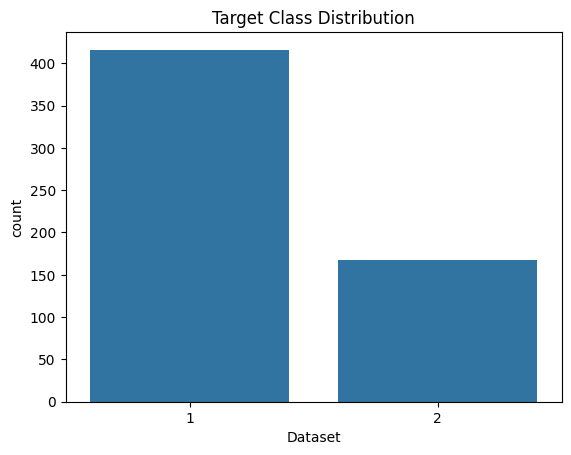

In [4]:
target_col = df['Dataset']   # nel dataset ILPD, 1 = Diseased, 2 = Healthy
print("\n### Target Distribution:\n")
print(target_col.value_counts())

sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()

## Distributions (Histograms + Density)

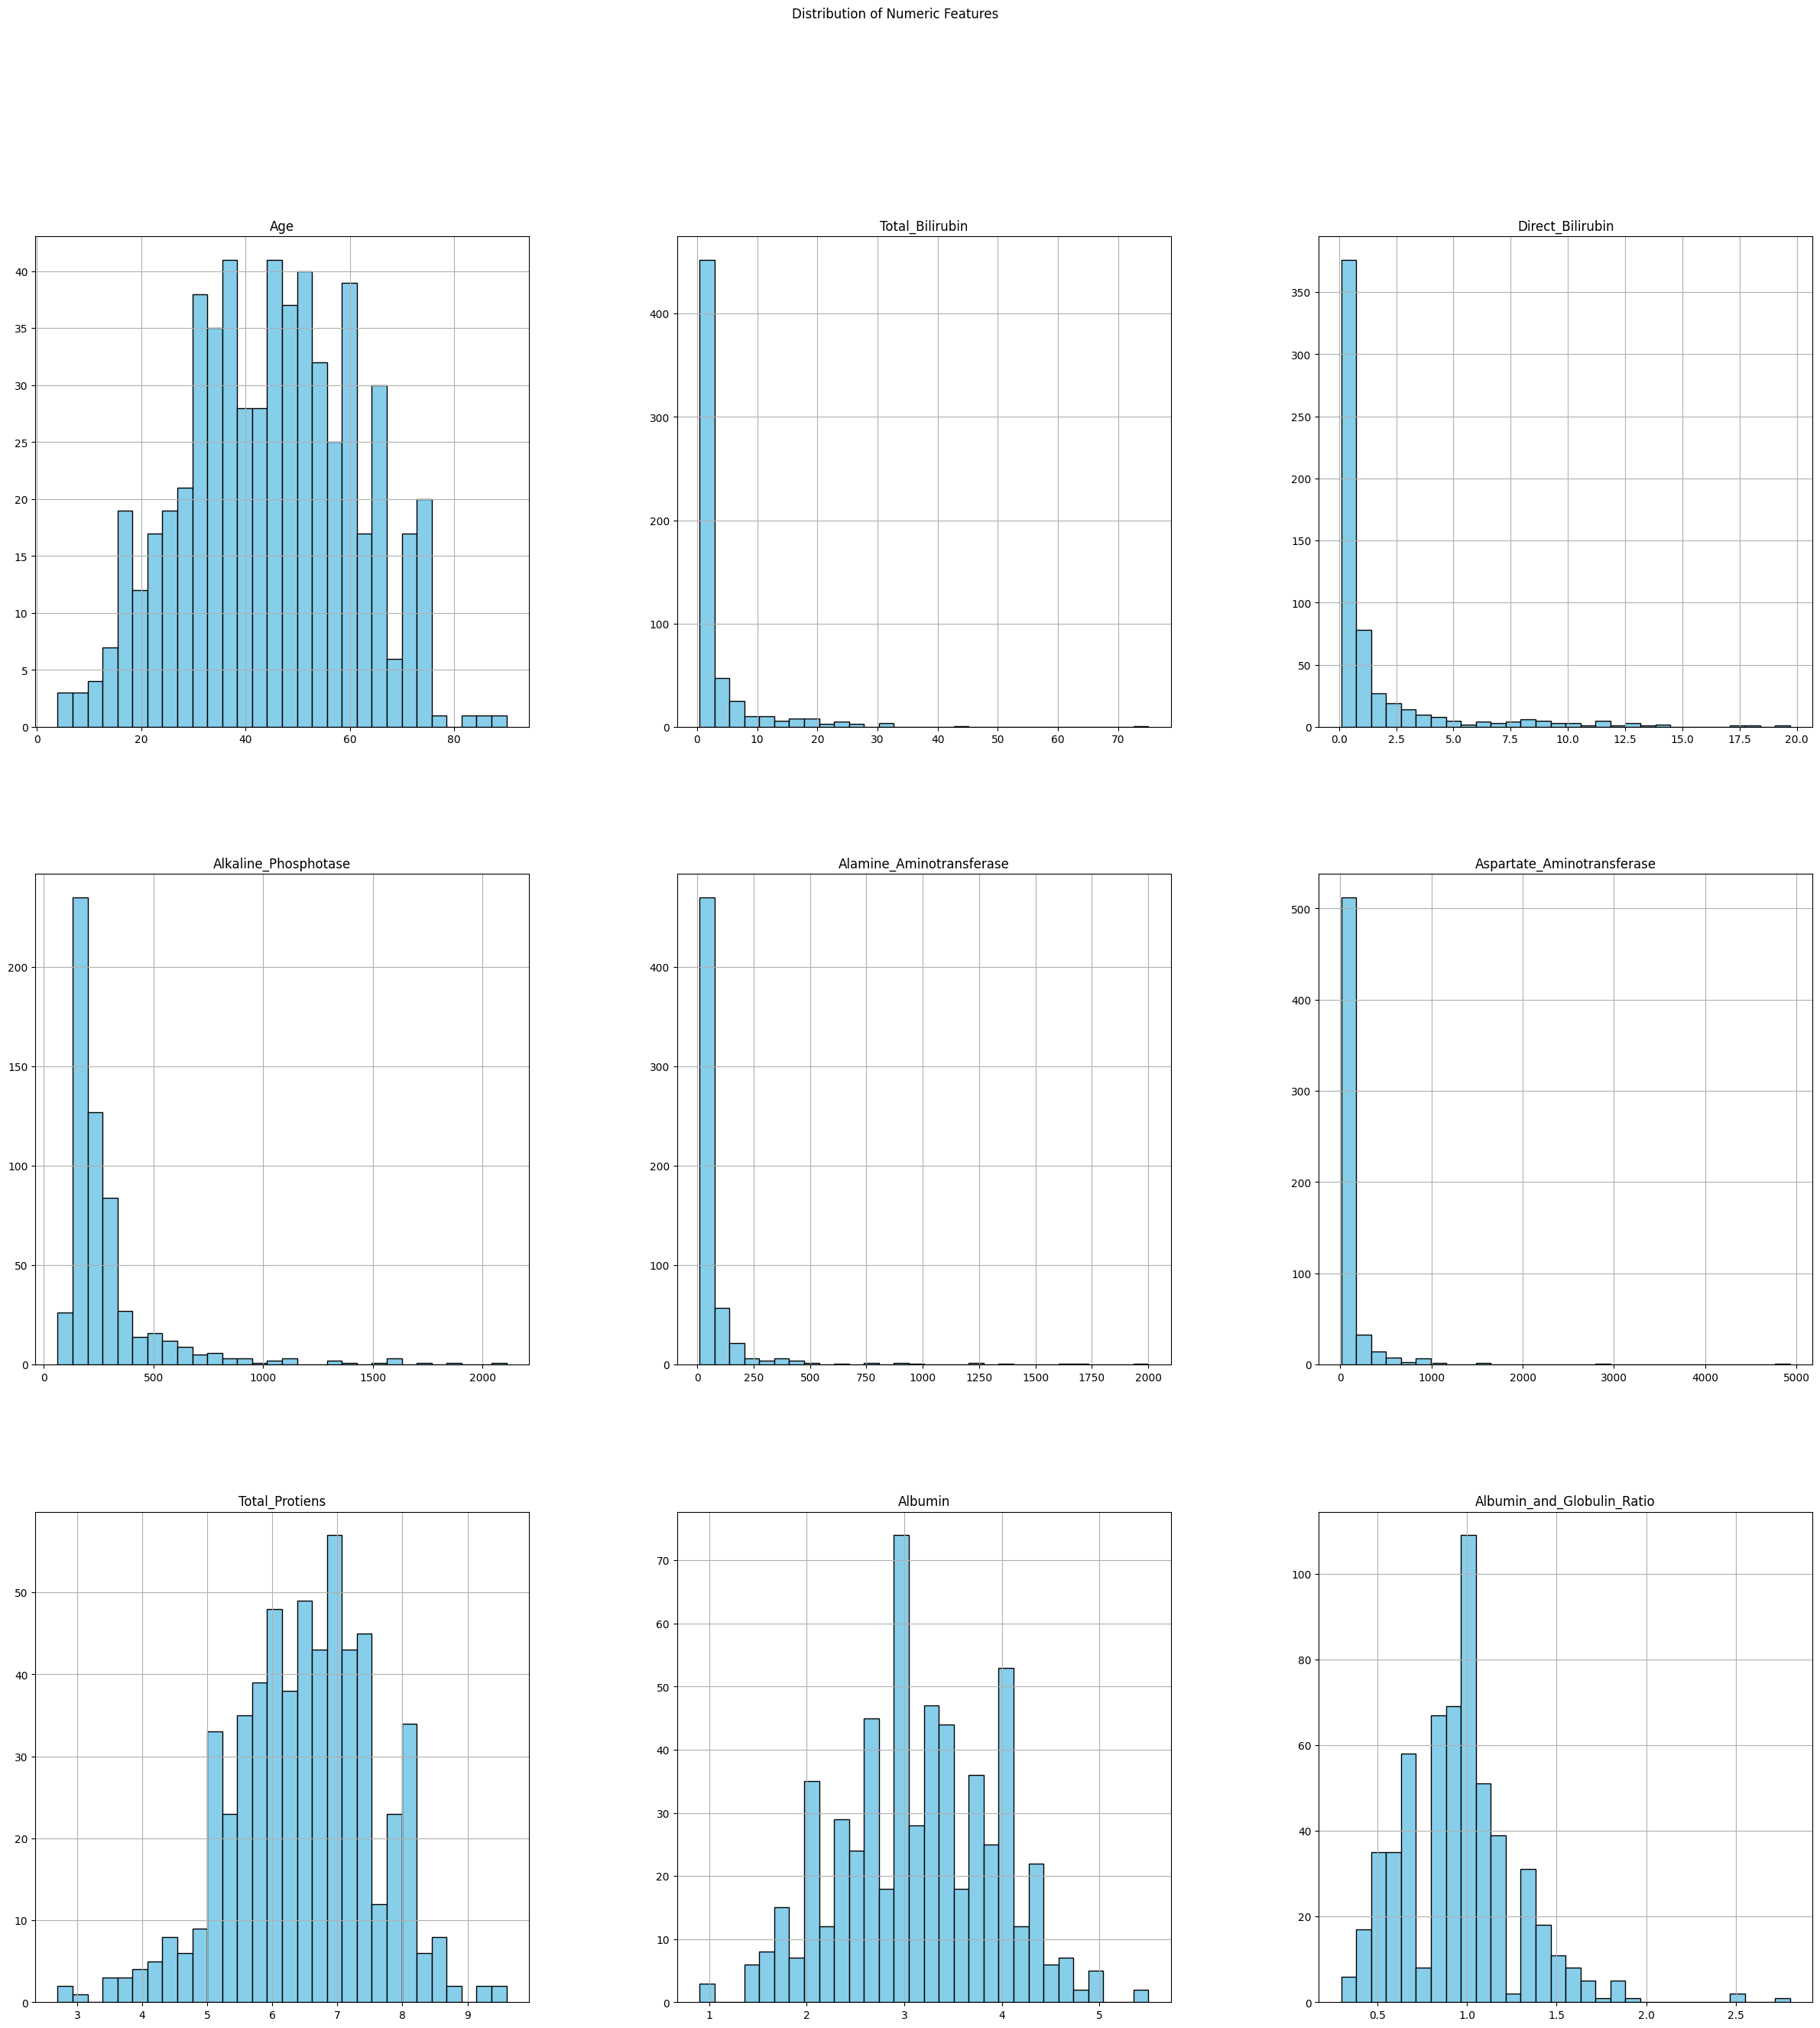

In [5]:
num_vars= numerical_features
df[num_vars].hist(bins=30, figsize=(30, 30), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=12)
plt.show()

## Outlier Detection (Boxplots)

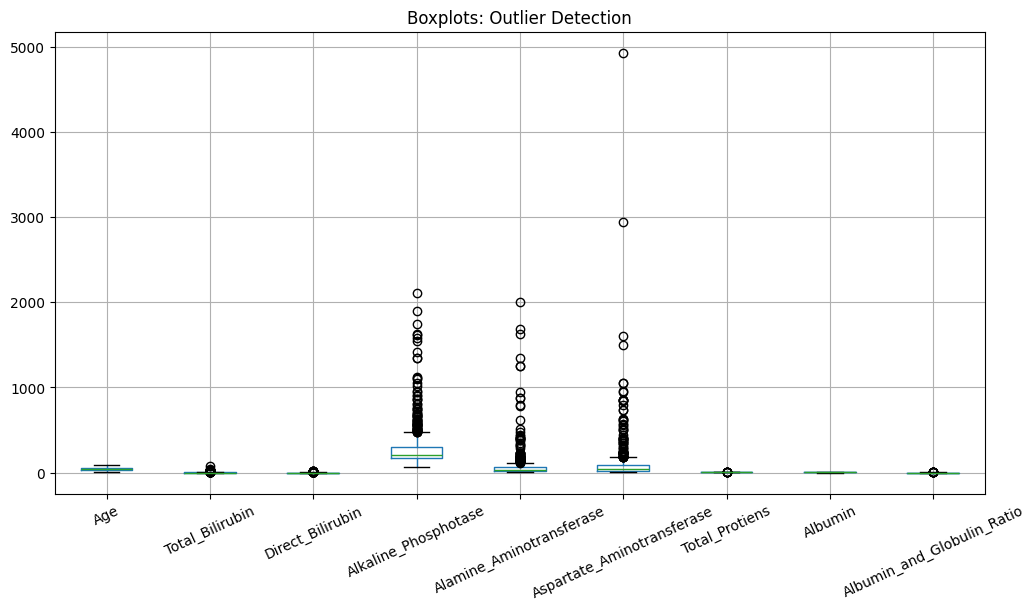

In [6]:
plt.figure(figsize=(12,6) )
df[num_vars].boxplot()
plt.title("Boxplots: Outlier Detection")
plt.xticks(rotation=25)
plt.show()

## Violin Plots by Class

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


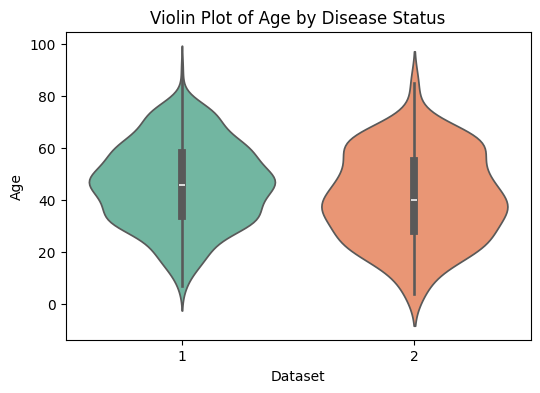

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


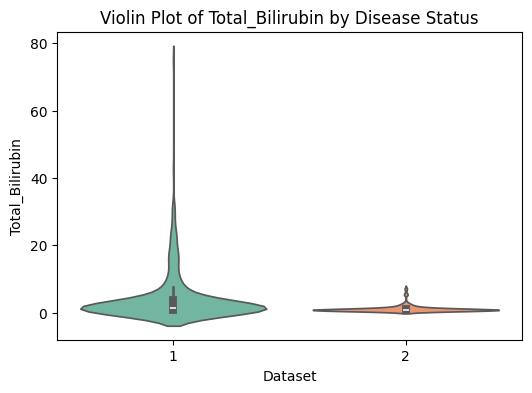

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


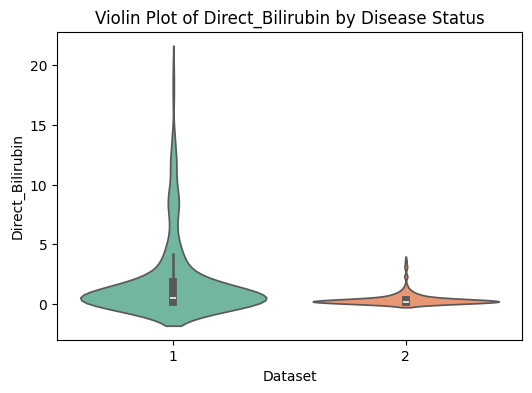

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


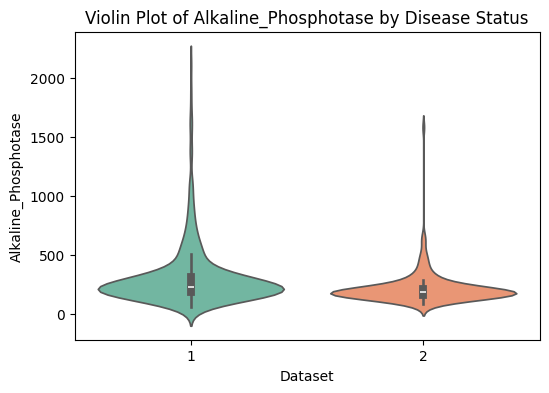

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


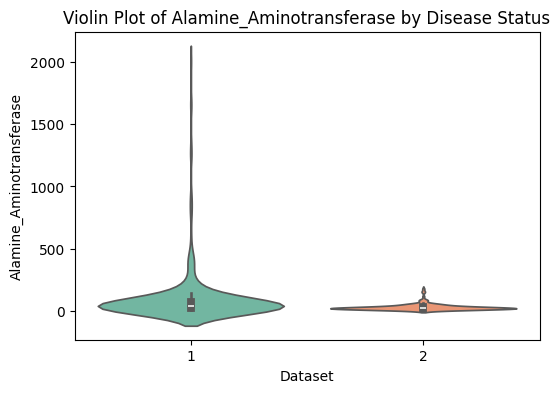

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


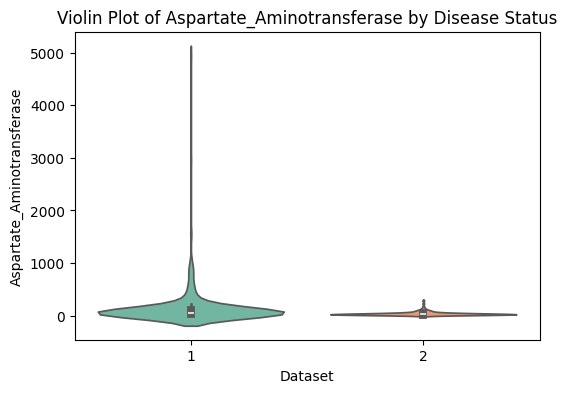

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


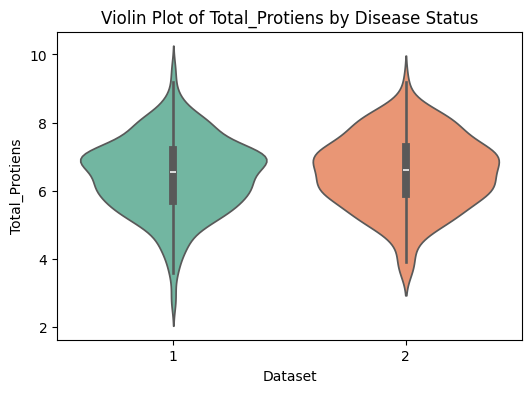

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


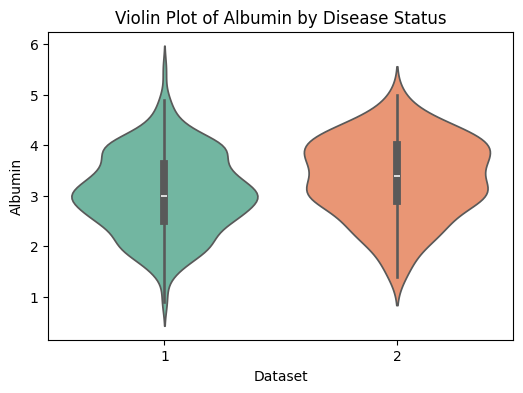

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1766108673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")


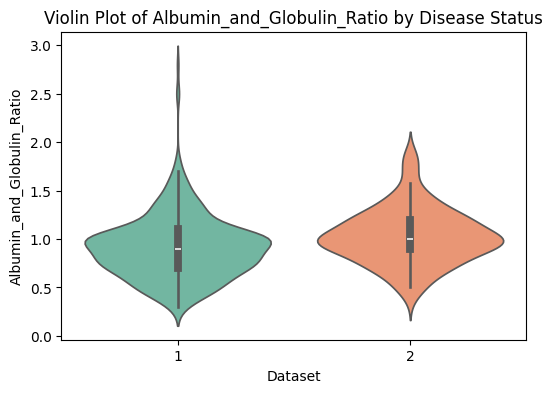

In [7]:

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=target_col, y=col, data=df, palette="Set2", inner="box")
    plt.title(f"Violin Plot of {col} by Disease Status")
    plt.show()

## Correlation Heatmap

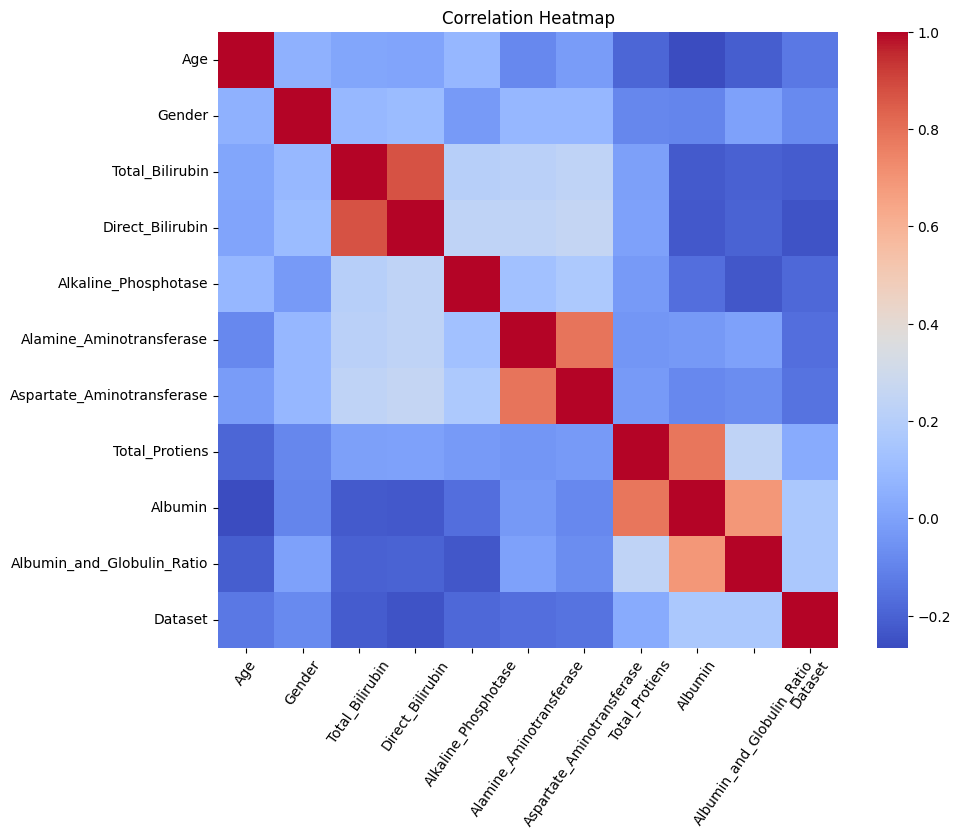

In [8]:
cat_vars= categorical_features
# Se ci sono variabili categoriche (es. Gender), le codifichiamo numericamente
df_encoded = df.copy()
for c in cat_vars:
    le = LabelEncoder()
    df_encoded[c] = le.fit_transform(df_encoded[c].astype(str))

plt.figure(figsize=(10, 8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.xticks(rotation=55)
plt.show()

## Min e Max per le variabili numeriche

In [9]:
min_max_table = pd.DataFrame({
    'Attribute': num_vars,
    'Min': [df[col].min() for col in num_vars],
    'Max': [df[col].max() for col in num_vars]
})
print("\n### Min and Max Values for Numerical Attributes:\n")
print(min_max_table)


### Min and Max Values for Numerical Attributes:

                    Attribute   Min     Max
0                         Age   4.0    90.0
1             Total_Bilirubin   0.4    75.0
2            Direct_Bilirubin   0.1    19.7
3        Alkaline_Phosphotase  63.0  2110.0
4    Alamine_Aminotransferase  10.0  2000.0
5  Aspartate_Aminotransferase  10.0  4929.0
6              Total_Protiens   2.7     9.6
7                     Albumin   0.9     5.5
8  Albumin_and_Globulin_Ratio   0.3     2.8


## Ultime osservazioni generali sulle variabili

In [10]:
print("\n### Summary Notes:")
print(f"- Numero di osservazioni: {df.shape[0]}")
print(f"- Numero di variabili: {df.shape[1]}")
print(f"- Variabili numeriche: {len(num_vars)} | Categorical: {len(cat_vars)}")
print(f"- Valori mancanti: {df.isnull().sum().sum()} totali")


### Summary Notes:
- Numero di osservazioni: 583
- Numero di variabili: 11
- Variabili numeriche: 9 | Categorical: 1
- Valori mancanti: 4 totali


## Pulizia e preparazione base

In [11]:
# Rinominare le colonne per semplicità
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Sostituiamo i valori target con 0/1 per analisi numerica
# Nel dataset ILPD: 1 = malato, 2 = sano
df['diseased'] = df['dataset'].apply(lambda x: 1 if x == 1 else 0)
df.drop(columns=['dataset'], inplace=True)

# Encoding variabili categoriche (es. Gender)
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))  # Male=1, Female=0

## Correlazioni con la variabile target

In [12]:
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['diseased'].drop('diseased').sort_values(ascending=False)

print("\n### Correlazioni con la variabile target (diseased):\n")
print(target_corr)

# Selezioniamo i due predittori più correlati
top2 = target_corr.head(2).index.tolist()
print(f"\n### Due predittori di maggior impatto: {top2}\n")


### Correlazioni con la variabile target (diseased):

direct_bilirubin              0.246046
total_bilirubin               0.220208
alkaline_phosphotase          0.184866
alamine_aminotransferase      0.163416
aspartate_aminotransferase    0.151934
age                           0.137351
gender                        0.082416
total_protiens               -0.035008
albumin                      -0.161388
albumin_and_globulin_ratio   -0.163131
Name: diseased, dtype: float64

### Due predittori di maggior impatto: ['direct_bilirubin', 'total_bilirubin']



## Multicollinearità (tra tutte le variabili numeriche)

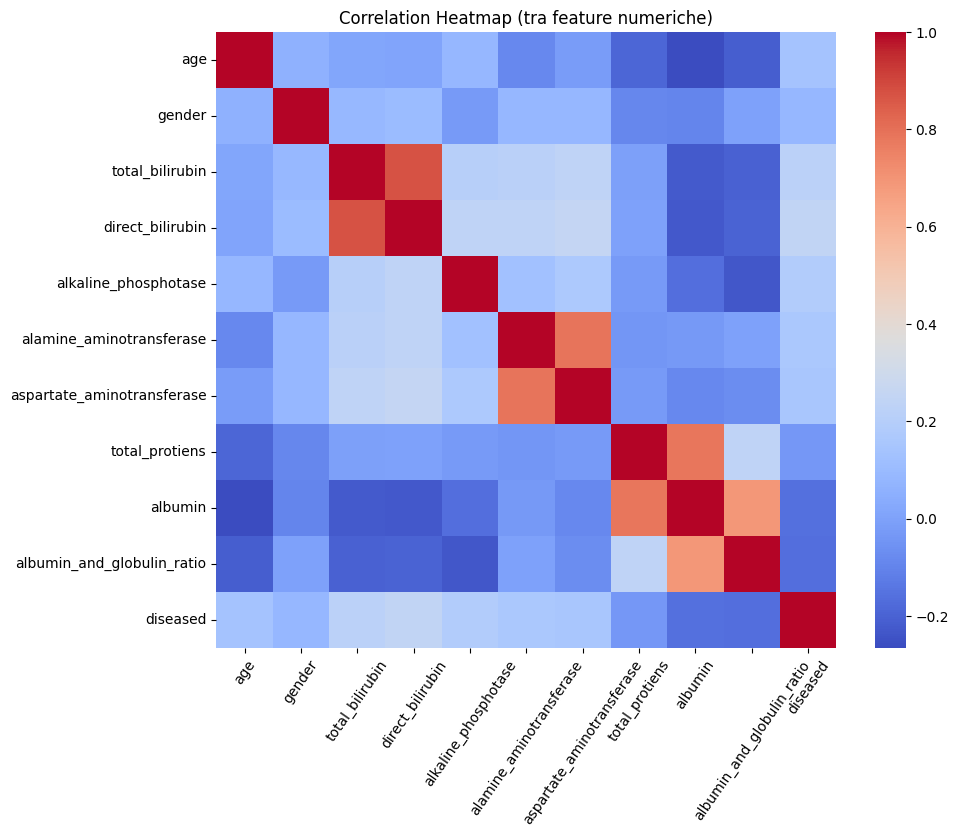


### Possibile multicollinearità:
total_bilirubin  direct_bilirubin    0.874618
dtype: float64


In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (tra feature numeriche)")
plt.xticks(rotation=55)
plt.show()

print("\n### Possibile multicollinearità:")
high_corr_pairs = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool)).stack()
print(high_corr_pairs[high_corr_pairs.abs() > 0.8])

## Distribuzioni per classe (Boxplot)

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1258550076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diseased', y=col, data=df, palette='Set2')


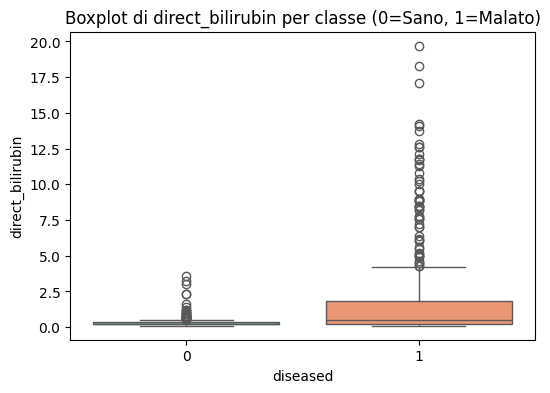

C:\Users\storrero\AppData\Local\Temp\ipykernel_19424\1258550076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diseased', y=col, data=df, palette='Set2')


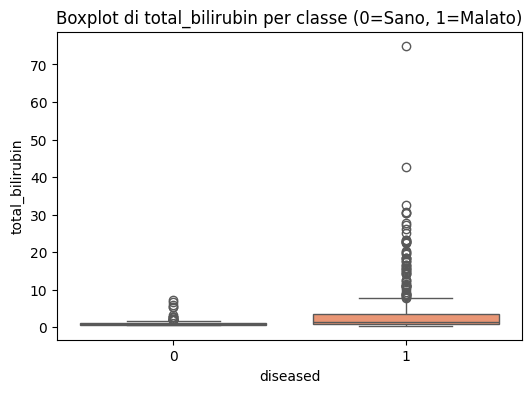

In [14]:
for col in top2:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='diseased', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot di {col} per classe (0=Sano, 1=Malato)")
    plt.show()

## Conclusioni automatiche

In [15]:
print("\n### Conclusioni EDA:")
print(f"- Variabili più correlate con la malattia: {top2[0]} ({target_corr[top2[0]]:.2f}), {top2[1]} ({target_corr[top2[1]]:.2f})")

df['diseased'].value_counts(normalize=True)


### Conclusioni EDA:
- Variabili più correlate con la malattia: direct_bilirubin (0.25), total_bilirubin (0.22)


diseased
1    0.713551
0    0.286449
Name: proportion, dtype: float64

# KNN MODEL

In [16]:

# Suponiendo que X y y ya están definidos
# === PASO CRÍTICO: ELIMINACIÓN DE LA VARIABLE REDUNDANTE === 
# (por la posible multicolinealidad de las variables y evitar redundancia)
# Eliminamos la variable 'direct_bilirubin' de X antes de la división (Holdout)
if 'Total_Bilirubin' in X.columns:
    X = X.drop('Total_Bilirubin', axis=1)
    print("✅ Variable 'Total_Bilirubin' eliminada de X.")
else:
    print("⚠️ Advertencia: 'Total_Bilirubin' no se encontró en X para eliminar.")
    
# La siguiente línea reconstruye numerical_features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# CORRECCIÓN: stratify debe ser igual a la variable de respuesta 'y'
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # ¡Aquí está la corrección!
)

print("--- 1. División Holdout Estratificado ---")
print(f"Tamaño de Entrenamiento (para CV): {X_train.shape[0]}")
print(f"Tamaño de Prueba (Holdout): {X_test.shape[0]}")

✅ Variable 'Total_Bilirubin' eliminada de X.
--- 1. División Holdout Estratificado ---
Tamaño de Entrenamiento (para CV): 466
Tamaño de Prueba (Holdout): 117


In [17]:
#DEFINICIÓN DEL PIPELINE ROBUSTO (PREPROCESAMIENTO) ---

#El uso de pipeline + GridSearchCV asegura que no haya fuga de datos (data leakage) entre el conjunto de entrenamiento y el de prueba.
#Pipeline para Datos Numéricos (Imputación y Estandarización)
# CÓDIGO CORREGIDO PARA numeric_transformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),# Imputación con media (learns from train)
    ('scaler', StandardScaler()),# Estandarización (learns from train)
    ('select_kbest', SelectKBest(score_func=mutual_info_classif)) # Selección de características (learns from train)
    #Solo permitirá el paso de las 2 variables numéricas que obtengan el F-value más alto. 
    #Todas las demás variables numéricas se eliminan del conjunto de datos.
    #Un valor F más alto indica una característica más predictiva
])

#Pipeline para Datos Categóricos (Imputación y One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')), # Imputar los valores faltantes con la moda 
    #en nuestro caso no pasa eso, visto en EDA
    ('onehot', OneHotEncoder())     # One-Hot Encoding
])

#Combinación de Transformadores (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features) # <-- Usando 'cat'
    ],
    remainder='passthrough'
)

#Definición del Pipeline Final (Preproceso -> KNN)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])


In [18]:
#AJUSTE DE HIPERPARÁMETROS (VALIDACIÓN INTERNA con CV=10)

#Definición del Espacio de Hiperparámetros
param_grid = {
    # El prefijo 'knn__' enlaza con el paso 'knn' del Pipeline
    'knn__n_neighbors': list(range(1, 50, 2)), #k impares por v rpta categórica biclase
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights': ['uniform', 'distance'],
    'preprocessor__num__select_kbest__k': list(range(1, 9))
}

#Grid Search con Validación Cruzada (CV=10)
grid_search = GridSearchCV(
    estimator=model_pipeline, 
    param_grid=param_grid, 
    scoring='accuracy', # Métrica para seleccionar la mejor combinación de HP
    cv=10, 
    verbose=0, 
    n_jobs=-1 
)

print("\n--- 2. Grid Search y Validación Interna (CV=10) ---")
print("El Pipeline garantiza: Imputación y Escalado se ajustan SOLO en los folds de Entrenamiento.")

#Ejecutar el Ajuste (en el 80% de Entrenamiento)
grid_search.fit(X_train, y_train)

#Obtener los Hiperparámetros Ideales
best_params = grid_search.best_params_
print("\n* Mejor combinación de HP encontrada:", best_params)
print(f"* Mejor Accuracy Promedio (CV): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_ # Este es el modelo final con los mejores HP


--- 2. Grid Search y Validación Interna (CV=10) ---
El Pipeline garantiza: Imputación y Escalado se ajustan SOLO en los folds de Entrenamiento.

* Mejor combinación de HP encontrada: {'knn__metric': 'manhattan', 'knn__n_neighbors': 27, 'knn__weights': 'distance', 'preprocessor__num__select_kbest__k': 5}
* Mejor Accuracy Promedio (CV): 0.7533


In [19]:
#Extra: para saber las 2 variables numéricas más relevantes seleccionadas:
# 1. Acceder al objeto ColumnTransformer del mejor modelo
column_transformer = best_model.named_steps['preprocessor']

# 2. Acceder al Pipeline Numérico ('num')
numeric_pipeline = column_transformer.named_transformers_['num']

# 3. Acceder al selector SelectKBest ('select_kbest') dentro del Pipeline Numérico
kbest_selector = numeric_pipeline.named_steps['select_kbest']

# 4. Obtener los índices Booleanos de las características seleccionadas (True si se mantiene)
selected_mask = kbest_selector.get_support()

# 5. Usar el mask para filtrar los nombres originales
# IMPORTANTE: Esto asume que la lista 'numerical_features' está disponible
mejores_features = [
    feature for i, feature in enumerate(numerical_features) if selected_mask[i]
]

print("\n--- Variables Numéricas Seleccionadas ---")
print(f"Las {kbest_selector.k} características numéricas más relevantes son:")
print(mejores_features)


--- Variables Numéricas Seleccionadas ---
Las 5 características numéricas más relevantes son:
['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']


In [20]:
#Modelo sin ajuste de HP/Modelo base (HP por defecto):para comparación
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline # Necesaria si no está importada

# 1. Definición del Pipeline Base (Reutiliza el preprocesador)
# El estimador KNeighborsClassifier() se inicializa con HP por defecto (k=5, weights='uniform', metric='minkowski')
base_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier()) # HP por defecto
])

print("\n--- 3. Modelo Base (HP por Defecto) ---")

# 2. Entrenamiento del Modelo Base (solo en el 80% de entrenamiento)
# El preprocesador (imputación, escalado, SelectKBest) y el KNN se ajustan en X_train
base_model_pipeline.fit(X_train, y_train)

# 3. Predicción en el Conjunto de Prueba (Holdout 20%)
y_pred_base = base_model_pipeline.predict(X_test)

# 4. Evaluación del Modelo Base
print("\n* Métricas en el Conjunto de Prueba (Holdout 20%) - Base *")

final_accuracy_base = accuracy_score(y_test, y_pred_base)
# Usamos 'weighted' para ser consistentes con la evaluación del modelo optimizado
final_precision_base = precision_score(y_test, y_pred_base, average='weighted', zero_division=0)
final_f1_score_base = f1_score(y_test, y_pred_base, average='weighted', zero_division=0)

print(f"-> Accuracy Base: {final_accuracy_base:.4f}")
print(f"-> Precision Base: {final_precision_base:.4f}")
print(f"-> F1-Score Base: {final_f1_score_base:.4f}")

# --- Comparación con el Modelo Optimizado ---

# Asegúrate de que las métricas del mejor modelo del GridSearch estén disponibles
# Si el código de tu GridSearch se ejecutó antes, tienes:
# final_accuracy_optimized = accuracy_score(y_test, best_model.predict(X_test))

print("\n--- RESUMEN DE COMPARACIÓN ---")
print(f"Accuracy Optimizado (GridSearch): {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"Accuracy Base (HP por Defecto): {final_accuracy_base:.4f}")


--- 3. Modelo Base (HP por Defecto) ---

* Métricas en el Conjunto de Prueba (Holdout 20%) - Base *
-> Accuracy Base: 0.6496
-> Precision Base: 0.6404
-> F1-Score Base: 0.6446

--- RESUMEN DE COMPARACIÓN ---
Accuracy Optimizado (GridSearch): 0.6581
Accuracy Base (HP por Defecto): 0.6496


c:\Users\storrero\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [21]:
#EVALUACIÓN FINAL (VALIDACIÓN EXTERNA con HOLD OUT) ---

#Predicción en el Conjunto de Prueba (20% Holdout)
# El Pipeline aplica la transformación (imputación/escalado) aprendida en X_train a X_test.
y_pred = best_model.predict(X_test)

#Evaluación con Múltiples Métricas
print("\n--- 3. Evaluación Final en el Conjunto de Prueba (Holdout 20%) ---")

# Calculamos las métricas solicitadas
final_accuracy = accuracy_score(y_test, y_pred)
# Usamos 'weighted' para promediar las métricas de clasificación en múltiples clases
final_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
final_f1_score = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"-> Accuracy (Precisión Global): {final_accuracy:.4f}")
print(f"-> Precision (Precisión Ponderada): {final_precision:.4f}")
print(f"-> F1-Score (Equilibrio Precisión/Recall): {final_f1_score:.4f}")



--- 3. Evaluación Final en el Conjunto de Prueba (Holdout 20%) ---
-> Accuracy (Precisión Global): 0.6581
-> Precision (Precisión Ponderada): 0.6277
-> F1-Score (Equilibrio Precisión/Recall): 0.6384


In [22]:
# --- CÓDIGO FINAL DE EVALUACIÓN ---
print("\n\n--- 6. Entrenamiento y Evaluación con el DATASET COMPLETO (X) ---")

#Clonar el mejor Pipeline para evitar modificar el que ya se usó para la evaluación final
# Es importante "reajustar" el Pipeline en TODOS los datos para que el imputador y el escalador
# aprendan las estadísticas finales (media, desviación estándar, moda) de X completo.
final_deployment_model = best_model.set_params(**best_params) 
# Clonar el Pipeline final y asegurarnos de usar los mejores HP.

#Reajustar el Pipeline en el DATASET COMPLETO (X)
# El Pipeline aprende las estadísticas finales de imputación/escalado de X completo.
final_deployment_model.fit(X, y) 
print("Pipeline final re-entrenado con el 100% de los datos.")

#Predicción en el DATASET COMPLETO (X)
#Las métricas en X muestran el rendimiento de "memorización" o rendimiento máximo teórico.
y_full_pred = final_deployment_model.predict(X)

#Evaluación del Rendimiento de Entrenamiento (Training Score)
print("\n* Métricas en el 100% del Dataset (X) *")

full_accuracy = accuracy_score(y, y_full_pred)
full_precision = precision_score(y, y_full_pred, average='weighted', zero_division=0)
full_f1_score = f1_score(y, y_full_pred, average='weighted', zero_division=0)

print(f"-> Accuracy (Rendimiento Máximo): {full_accuracy:.4f}")
print(f"-> Precision (Ponderada): {full_precision:.4f}")
print(f"-> F1-Score (Ponderado): {full_f1_score:.4f}")



--- 6. Entrenamiento y Evaluación con el DATASET COMPLETO (X) ---
Pipeline final re-entrenado con el 100% de los datos.

* Métricas en el 100% del Dataset (X) *
-> Accuracy (Rendimiento Máximo): 1.0000
-> Precision (Ponderada): 1.0000
-> F1-Score (Ponderado): 1.0000
